# MLOps Lab5.
Автор - Савоськина С.В.

## 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2.Функции тестирования

In [2]:
%%writefile "lab5/test_score.py"
import pytest
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

filename = "lab5/data.csv"
ds = pd.read_csv(filename, sep=',')
parameters = [
    (ds.y1, ds.yp),
    (ds.y2, ds.yp),
    (ds.y3, ds.yp),
    (ds.y4, ds.yp),
]


@pytest.mark.parametrize(
    ('y_fact', 'y_pred'),
    parameters)
def test_mse(y_fact, y_pred):
    assert mean_squared_error(y_fact, y_pred) < 0.5


@pytest.mark.parametrize(
    ('y_fact', 'y_pred'),
    parameters)
def test_r2(y_fact, y_pred):
    assert r2_score(y_fact, y_pred) > 0.95

Overwriting lab5/test_score.py


## 3. Датасеты с «качественными данными»
### 3.1. Генерация 3-х датасетов с «качественными данными»

In [3]:
def define_y(x, seed, delta):
    np.random.seed(seed=seed)
    return 1.3 * xs * (1 + np.random.random(100) * (0.2 + delta))


xs = np.linspace(0, 10, 100)
SEED1 = 42
SEED2 = 128
SEED3 = 421
ys = [
    define_y(xs, SEED1, 0),
    define_y(xs, SEED2, 0.03),
    define_y(xs, SEED3, -0.02),
]

### 3.2. Обучение модели и предсказание

In [4]:
model = LinearRegression()
model.fit(xs.reshape(-1, 1), ys[0])
predicted_y = model.predict(xs.reshape(-1, 1))

### 3.3. Вывод графиков

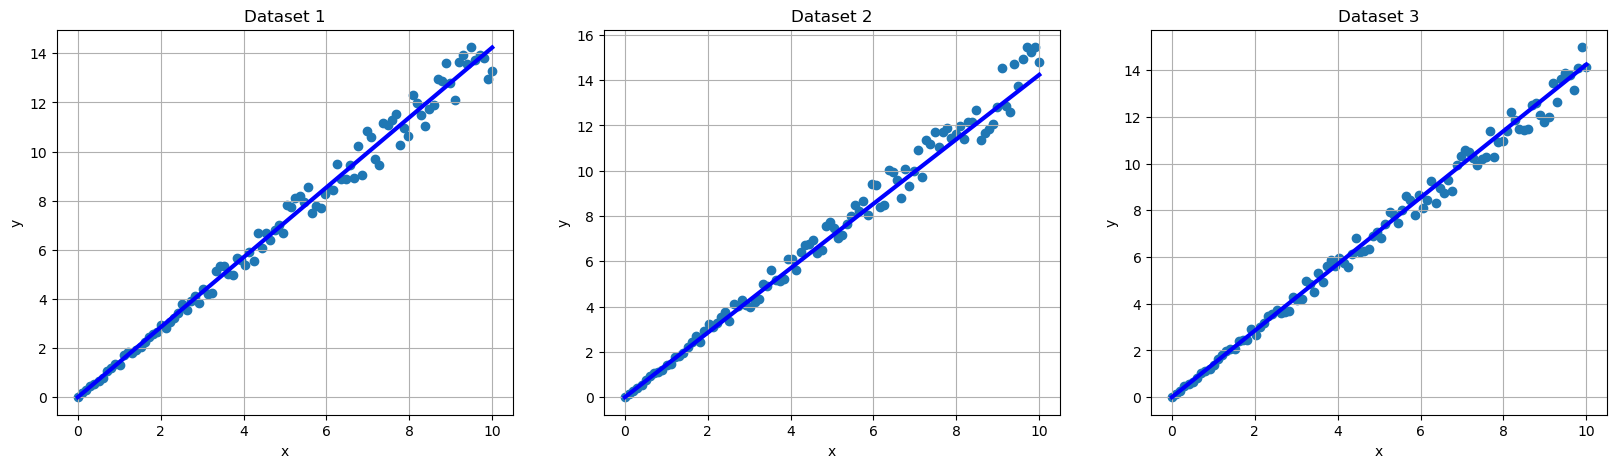

In [5]:
def plot_data(x, y, y_pred, title):
    plt.scatter(x, y)
    plt.plot(x, y_pred, color="blue", linewidth=3)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()


fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for idx, y in enumerate(ys):
    plt.subplot(1, 3, idx + 1)
    plot_data(xs, y, predicted_y, f"Dataset {idx + 1}")

plt.show()

### 3.4. Метрики

In [6]:
def show_metrics(y, y_pred, title):
    print(f"Метрики для {title}:")
    print("Mean squared error: %.4f" % mean_squared_error(y, y_pred))
    print("Coefficient of determination: %.4f" % r2_score(y, y_pred))
    print("")


for idx, y in enumerate(ys):
    show_metrics(y, predicted_y, f"Dataset {idx + 1}")

Метрики для Dataset 1:
Mean squared error: 0.1903
Coefficient of determination: 0.9891

Метрики для Dataset 2:
Mean squared error: 0.2997
Coefficient of determination: 0.9840

Метрики для Dataset 3:
Mean squared error: 0.1356
Coefficient of determination: 0.9919



## 4. Генерация датасета с «некачественными данными»

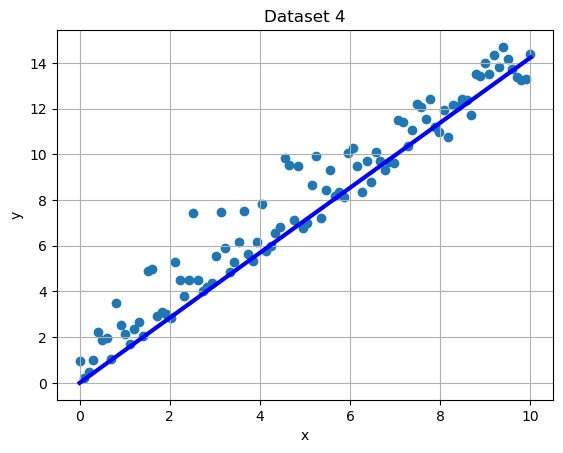

Метрики для Dataset 4:
Mean squared error: 1.4427
Coefficient of determination: 0.9098



In [7]:
SEED4 = 127
np.random.seed(seed=SEED4)
ys_n = define_y(xs, SEED4, -0.04) + np.random.exponential(0.7, 100)
plot_data(xs, ys_n, predicted_y, "Dataset 4")
plt.show()
show_metrics(ys_n, predicted_y, "Dataset 4")

## 5. Сохранение датасетов

In [8]:
ds = pd.DataFrame({'x': xs, 'yp': predicted_y, 'y1': ys[0], 'y2': ys[1], 'y3': ys[2], 'y4': ys_n})
filename = "lab5/data.csv"
ds.to_csv(filename, index=False)

## 6. Запуск тестов Pytest

Зачем-то запускаем тесты из ноутбука. Мы не ищем легких путей!!!

In [9]:
!pytest -v 'test_score.py'

============================= test session starts ==============================
platform linux -- Python 3.10.7, pytest-7.2.0, pluggy-1.0.0 -- /home/svs/data/projects/python/urfu/mod1/env1/bin/python
cachedir: .pytest_cache
rootdir: /home/svs/data/projects/python/urfu/mlops_practice
plugins: anyio-3.6.2
collected 8 items                                                              

test_score.py::test_mse[y_fact0-y_pred0] PASSED                          [ 12%]
test_score.py::test_mse[y_fact1-y_pred1] PASSED                          [ 25%]
test_score.py::test_mse[y_fact2-y_pred2] PASSED                          [ 37%]
test_score.py::test_mse[y_fact3-y_pred3] FAILED                          [ 50%]
test_score.py::test_r2[y_fact0-y_pred0] PASSED                           [ 62%]
test_score.py::test_r2[y_fact1-y_pred1] PASSED                           [ 75%]
test_score.py::test_r2[y_fact2-y_pred2] PASSED                           [ 87%]
test_score.py::test_r2[y_fact3-y_pred3] FAILED       

## Выводы

Тесты с зашумленными данными провалились. Качество предсказания на зашумленных данных низкое и не обеспечивает требуемые значения метрик.
